In [1]:
import numpy as np
import pandas as pd
import zipfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
books_zf = zipfile.ZipFile("D:\\book-recommendation-system\\Books.csv.zip")
users_zf = zipfile.ZipFile("D:\\book-recommendation-system\\Users.csv.zip")
ratings_zf = zipfile.ZipFile("D:\\book-recommendation-system\\Ratings.csv.zip")


In [3]:
books = pd.read_csv(books_zf.open("Books.csv"))
users = pd.read_csv(users_zf.open("Users.csv"))
ratings = pd.read_csv(ratings_zf.open("Ratings.csv"))

In [4]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [5]:
users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [6]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [7]:
books.shape

(271360, 8)

In [8]:
ratings.shape

(1149780, 3)

In [9]:
users.shape

(278858, 3)

In [10]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
books.duplicated().sum()

0

In [14]:
users.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

In [16]:
df_books_ratings = ratings.merge(books, on = "ISBN") 

In [17]:
df_books_ratings.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [18]:
num_rating_df = df_books_ratings.groupby('Book-Title').count()["Book-Rating"].reset_index()
num_rating_df.rename(columns = {"Book-Rating" : "num_ratings"}, inplace = True)

In [19]:
num_rating_df.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [20]:
avg_rating_df = df_books_ratings.groupby('Book-Title').mean()["Book-Rating"].reset_index()
avg_rating_df.rename(columns = {"Book-Rating" : "avg_ratings"}, inplace = True)

In [21]:
avg_rating_df.head(3)

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00


In [22]:
popular_df = num_rating_df.merge(avg_rating_df, on = "Book-Title")

In [23]:
popular_df.head(3)

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00


In [24]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values(
    by = "avg_ratings",ascending = False).head(50)

In [25]:
popular_df.head()

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [26]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
popular_df = popular_df.merge(books, on = "Book-Title").drop_duplicates(
    "Book-Title")[["Book-Title", "Book-Author", "Image-URL-M", "num_ratings", "avg_ratings"]]

In [28]:
popular_df = popular_df.T.drop_duplicates().T

In [29]:
popular_df.rename(columns={"Book-Author_x":"Book-Author", "Image-URL-M_y" : "Image-URL-M"}, inplace = True)

In [30]:
popular_df.reset_index(inplace = True)

In [31]:
popular_df.drop(["index"], axis = 1, inplace = True)

In [32]:
popular_df.head(3)

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.73741


## Simple Collaborative Filtering

In [33]:
x = df_books_ratings.groupby("User-ID").count()["Book-Rating"] > 200
users_rating_200 = x[x].index

In [34]:
filtered_books_ratings_df = df_books_ratings[df_books_ratings["User-ID"].isin(users_rating_200)]

In [35]:
y = filtered_books_ratings_df.groupby("Book-Title").count()["Book-Rating"] >= 10
famous_books = y[y].index

In [36]:
df = filtered_books_ratings_df[filtered_books_ratings_df["Book-Title"].isin(famous_books)]

In [37]:
df.drop_duplicates(inplace = True)

In [38]:
df.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [39]:
df.shape

(191276, 10)

In [40]:
pt = pd.pivot_table(data = df, index = "Book-Title", columns = "User-ID", values = "Book-Rating")

In [41]:
pt.fillna(0, inplace = True)

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
similarity_score = cosine_similarity(pt)

In [44]:
def recommend(book_name):
    #Fetch Index from book name
    suggestion = []
    book_index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[book_index])), key = lambda x : x[1], reverse = True)[1:8]
    
    for i in similar_items:
        suggestion.append(pt.index[i[0]])
    return suggestion

In [45]:
recommend("The Vampire Lestat (Vampire Chronicles, Book II)")

['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
 'The Queen of the Damned (Vampire Chronicles (Paperback))',
 'Interview with the Vampire',
 'The Witching Hour (Lives of the Mayfair Witches)',
 'Memnoch the Devil (Vampire Chronicles, No 5)',
 'The Drawing of the Three (The Dark Tower, Book 2)',
 'Wizard and Glass (The Dark Tower, Book 4)']

In [46]:
recommend("The Notebook")

['A Walk to Remember',
 'Reba: My Story',
 'The Rescue',
 'Gates of Paradise',
 'One Door Away from Heaven',
 'Toxin',
 'The Five People You Meet in Heaven']

## KNN Recommender System

In [47]:
from scipy.sparse import csr_matrix

book_features_df_matrix = csr_matrix(pt.values)
book_features_df_matrix

<7830x811 sparse matrix of type '<class 'numpy.float64'>'
	with 44423 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.neighbors import NearestNeighbors 

model_knn = NearestNeighbors(metric = "cosine", algorithm="brute", n_jobs=-1)
model_knn.fit(book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [49]:
def KNN_recommender(book_name):
    
    suggestion = []
    book_index = np.where(pt.index == book_name)[0][0]
    distances, indices = model_knn.kneighbors(pt.iloc[book_index,:].values.reshape(1, -1), n_neighbors=8)
    similar_items = sorted(list(zip(indices.tolist()[0], distances.tolist()[0]))[1:], reverse = True, key = lambda x:x[1])
    suggestion = []
    
    for i in similar_items:
        suggestion.append(pt.index[i[0]])
    return suggestion

In [50]:
suggestion = KNN_recommender("The Vampire Lestat (Vampire Chronicles, Book II)")

In [51]:
suggestion

['Wizard and Glass (The Dark Tower, Book 4)',
 'The Drawing of the Three (The Dark Tower, Book 2)',
 'Memnoch the Devil (Vampire Chronicles, No 5)',
 'The Witching Hour (Lives of the Mayfair Witches)',
 'Interview with the Vampire',
 'The Queen of the Damned (Vampire Chronicles (Paperback))',
 'The Tale of the Body Thief (Vampire Chronicles (Paperback))']

In [52]:
KNN_recommender("The Notebook")

['The Five People You Meet in Heaven',
 'Toxin',
 'One Door Away from Heaven',
 'Gates of Paradise',
 'The Rescue',
 'Reba: My Story',
 'A Walk to Remember']

## ANN Recommender System

In [53]:
df.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [54]:
df["Book-Rating"].unique()

array([ 0,  9,  6,  3, 10,  7,  8,  5,  4,  2,  1], dtype=int64)

In [55]:
# Checking if there are any duplicate rows
duplicated_rows = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []


In [56]:
# Calculating the average score
avg_score = np.mean(df['Book-Rating'])
print('Average Score:', avg_score)

Average Score: 1.859135490077166


In [57]:
from sklearn.preprocessing import MinMaxScaler

# Scaling our "rating" column
# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'score' column between 0 and 1
df['scaled_score'] = scaler.fit_transform(df[['Book-Rating']])


In [58]:
df['scaled_score'].unique()

array([0. , 0.9, 0.6, 0.3, 1. , 0.7, 0.8, 0.5, 0.4, 0.2, 0.1])

In [59]:
df1 = df[["User-ID", "ISBN", "Book-Rating"]]

In [60]:
df1["Book-Rating"].unique()

array([ 0,  9,  6,  3, 10,  7,  8,  5,  4,  2,  1], dtype=int64)

In [61]:
df1["Book-Rating"] = df1["Book-Rating"] /df1["Book-Rating"].abs().max()

In [62]:
df1["Book-Rating"].unique()

array([0. , 0.9, 0.6, 0.3, 1. , 0.7, 0.8, 0.5, 0.4, 0.2, 0.1])

In [63]:
df1

,User-ID,ISBN,Book-Rating
2,6543,034545104X,0.0
5,23768,034545104X,0.0
7,28523,034545104X,0.0
15,77940,034545104X,0.0
16,81977,034545104X,0.0
...,...,...,...
1030065,274301,0575042729,0.0
1030173,274308,0449209849,0.0
1030220,274308,0812880846,0.0
1030824,275970,0865714215,0.0


In [64]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical data

## Encoding user IDs
user_encoder = LabelEncoder()
df["user_encoded"] = user_encoder.fit_transform(df["User-ID"])
num_users = len(user_encoder.classes_)

## Encoding book IDs
book_encoder = LabelEncoder()
df["book_encoded"] = book_encoder.fit_transform(df["ISBN"])
num_books = len(book_encoder.classes_)



# Printing dataset information
print("Number of unique users: {}, Number of unique book: {}".format(num_users, num_books))
print("Minimum rating: {}, Maximum rating: {}".format(min(df['Book-Rating']), max(df['Book-Rating'])))

Number of unique users: 811, Number of unique book: 15561
Minimum rating: 0, Maximum rating: 10


In [65]:
# userIds = df1["User-ID"].unique().tolist()
# user2user_encoded = {x: i for i, x in enumerate(userIds)}
# userencoded2user = {i: x for i, x in enumerate(userIds)}

# bookIds = df1["ISBN"].unique().tolist()
# book2book_encoded = {x: i for i, x in enumerate(bookIds)}
# book_encoded2book = {i: x for i, x in enumerate(bookIds)}

# df1["user"] = df1["User-ID"].map(user2user_encoded)
# df1["book"] = df1["ISBN"].map(book2book_encoded)

In [66]:
# bookIds = df1["ISBN"].unique().tolist()
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)

# Create feature matrix X and target variable y
X = df[['user_encoded', 'book_encoded']].values
y = df["scaled_score"].values

# Printing dataset information
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (191276, 2)
Shape of y: (191276,)


In [67]:
from sklearn.model_selection import train_test_split

test_set_size = 10000  # Number of samples to include in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))

Number of samples in the training set: 181276
Number of samples in the test set: 10000


In [68]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [69]:
# import tensorflow as tf

# # Setting TPU_INIT flag
# USE_TPU = True

# # Checking if TPU is initialized
# if USE_TPU:
#     # If tpu is connected then start creating TPUStrategy
#     tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
#     tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu_resolver)
# else:
#     !nvidia-smi
    
# # Print the TensorFlow version
# tf_version = tf.__version__
# print(f"TensorFlow version: {tf_version}")

In [70]:
# df1 = df1.sample(frac=1, random_state=42)

In [71]:
# X = df1[["user", "book"]].values
# # Normalize the targets between 0 and 1. Makes it easy to train
# y = df1["Book-Rating"]
# train_indices = int(0.9 * df.shape[0])
# X_train, X_test, y_train, y_test = (
#     X[ : train_indices],
#     X[train_indices : ],
#     y[ : train_indices],
#     y[train_indices : ]
# )

In [90]:
#!pip install keras


In [91]:
#!pip install tensorflow

In [92]:
#!pip install pydot

In [75]:
# import tensorflow as tf
# from tensorflow.keras.metrics import Precision, Recall

# class MeanAveragePrecision(tf.keras.metrics.Metric):
#     def __init__(self, name='mean_average_precision', **kwargs):
#         super(MeanAveragePrecision, self).__init__(name=name, **kwargs)
#         self.precision = Precision()
#         self.recall = Recall()
#         self.average_precision = self.add_weight(name='average_precision', initializer='zeros')
#         self.count = self.add_weight(name='count', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         self.precision.update_state(y_true, y_pred, sample_weight)
#         self.recall.update_state(y_true, y_pred, sample_weight)
#         average_precision = self.calculate_average_precision(y_true, y_pred)
#         self.average_precision.assign_add(average_precision)
#         self.count.assign_add(1.0)

#     def result(self):
#         precision_value = self.precision.result()
#         recall_value = self.recall.result()
#         average_precision_value = tf.math.divide_no_nan(self.average_precision, self.count)
#         self.reset_states()
#         return average_precision_value

#     def reset_states(self):
#         self.precision.reset_states()
#         self.recall.reset_states()
#         self.average_precision.assign(0.0)
#         self.count.assign(0.0)

#     def calculate_average_precision(self, y_true, y_pred):
#         sorted_indices = tf.argsort(y_pred, direction='DESCENDING')
#         sorted_y_true = tf.gather(y_true, sorted_indices)
#         true_positives = tf.math.cumsum(sorted_y_true)
#         indices = tf.range(1, tf.shape(sorted_y_true)[0] + 1)
#         precision = tf.math.divide_no_nan(true_positives, tf.cast(indices, tf.float32))  # Convert indices to float32
#         recall = tf.math.divide_no_nan(true_positives, tf.reduce_sum(y_true))
#         interpolated_precision = tf.reduce_max(precision, axis=0)
#         interpolated_precision = tf.concat([[0.0], interpolated_precision, [0.0]], axis=0)
#         recall = tf.concat([[0.0], recall, [1.0]], axis=0)
#         average_precision = tf.reduce_sum((recall[1:] - recall[:-1]) * interpolated_precision[:-1])
#         return average_precision

In [76]:
import os

current_path = os.getcwd()
print("Current working directory:", current_path)

Current working directory: C:\Users\lenovo


In [93]:
from keras.models import Model
from keras.models import load_model
from keras.optimizers import Adam
from keras.models import Sequential
from tensorflow import keras
from keras import layers
import pydot
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.layers import Reshape, Input, Embedding, Flatten, Dense, Dot, Dropout, Concatenate
from tensorflow.keras.regularizers import l2

from tensorflow.keras.layers import Dropout, Concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Dot
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall


def RecommenderNet(num_users, num_books, embedding_size=128):
    
    # User input layer and embedding layer
    user = Input(name='user_encoded', shape=[1])
    user_embedding = Embedding(name='user_embedding', input_dim=num_users, output_dim=embedding_size,
                               embeddings_regularizer=l2(1e-2))(user)
    user_embedding = Reshape(target_shape=[embedding_size])(user_embedding)  # Reshape user_embedding

    # Book input layer and embedding layer
    book = Input(name='book_encoded', shape=[1])
    book_embedding = Embedding(name='book_embedding', input_dim=num_books, output_dim=embedding_size,
                               embeddings_regularizer=l2(1e-2))(book)
    book_embedding = Reshape(target_shape=[embedding_size])(book_embedding)  # Reshape book_embedding

    # Dot product of user and Book embeddings
    dot_product = Dot(name='dot_product', normalize=True, axes=1)([user_embedding, book_embedding])

    # Dense layers for prediction
    dense1 = Dense(500, activation="relu", kernel_initializer="he_normal")(dot_product)
    dropout1 = Dropout(0.5)(dense1)  # Add dropout after the first dense layer

    dense2 = Dense(300, activation="relu", kernel_initializer="he_normal")(dropout1)
    dropout2 = Dropout(0.5)(dense2)  # Add dropout after the second dense layer

    dense3 = Dense(150, activation="relu", kernel_initializer="he_normal")(dropout2)
    dropout3 = Dropout(0.5)(dense3)  # Add dropout after the third dense layer

    dense4 = Dense(100, activation="relu", kernel_initializer="he_normal")(dropout3)
    dropout4 = Dropout(0.5)(dense4)  # Add dropout after the fourth dense layer

    # Concatenate user and book embeddings
    concatenated = Concatenate()([dropout4, user_embedding, book_embedding])

    dense5 = Dense(50, activation="relu", kernel_initializer="he_normal")(concatenated)
    dropout5 = Dropout(0.5)(dense5)  # Add dropout after the fifth dense layer

    output = Dense(1, activation="sigmoid")(dropout5)

    # Create and compile the model
    model = Model(inputs=[user, book], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[Precision(), Recall()])

    return model


model = RecommenderNet(num_users, num_books)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_encoded (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 book_encoded (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       103808      ['user_encoded[0][0]']           
                                                                                                  
 book_embedding (Embedding)     (None, 1, 128)       1991808     ['book_encoded[0][0]']           
                                                                                            

In [94]:
## Import necessary callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=1)

# File path for saving the model weights
checkpoint_filepath = 'D:\\book-recommendation-system\\working\\mybookweights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    early_stopping
]

In [95]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20
19/19 [==============================] - 6s 232ms/step - loss: 11.1808 - precision_1: 0.2354 - recall_1: 0.1069 - val_loss: 5.2499 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20
19/19 [==============================] - 4s 217ms/step - loss: 3.0226 - precision_1: 0.2727 - recall_1: 2.8139e-04 - val_loss: 1.4316 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/20
19/19 [==============================] - 4s 223ms/step - loss: 0.9902 - precision_1: 0.5385 - recall_1: 1.6415e-04 - val_loss: 0.7564 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/20
19/19 [==============================] - 4s 219ms/step - loss: 0.6852 - precision_1: 0.6000 - recall_1: 7.0348e-05 - val_loss: 0.6166 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/20
19/19 [==============================] - 4s 218ms/step - loss: 0.5933 - precision_1: 0.6522 - recall_1: 3.5174e-04 - val_loss: 0.5798 - val_precision_1: 0.0000e+00 - val_recall_1: 0.00

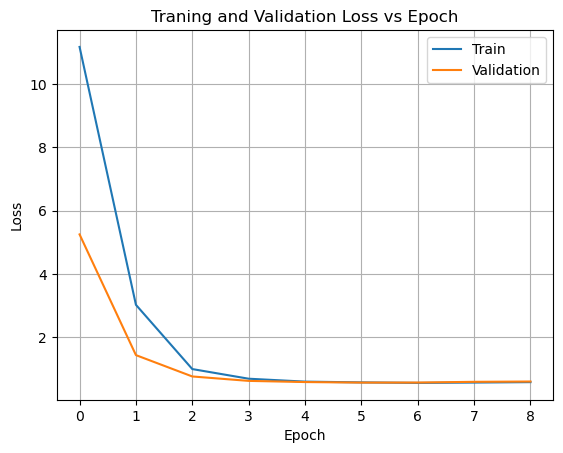

In [96]:
import matplotlib.pyplot as plt

# Training results visualization

plt.plot(history.history["loss"][0:])
plt.plot(history.history["val_loss"][0:])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("Traning and Validation Loss vs Epoch")
plt.grid()
plt.show()

In [97]:
def extract_weights(name, model):
    # Get the layer by name from the model
    weight_layer = model.get_layer(name)
    
    # Get the weights from the layer
    weights = weight_layer.get_weights()[0]
    
    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))
    
    return weights

# Extract weights for anime embeddings
book_weights = extract_weights('book_embedding', model)
# Extract weights for user embeddings
user_weights = extract_weights('user_embedding', model)

In [98]:
df_ref = filtered_books_ratings_df[filtered_books_ratings_df["Book-Title"].isin(famous_books)]
# Drop "User-ID" column and remove duplicate rows
df_processed = df_ref.drop(["User-ID", "Book-Rating"], axis=1).drop_duplicates()
df_processed[df_processed["ISBN"] == "0345313860"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
136484,0345313860,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,1986,Ballantine Books,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...


In [99]:
def find_similar_books(name, n=10, return_dist=False, neg=False):
    
    book_row = df_ref[df_ref['Book-Title'] == name].iloc[0]
    index = book_row['ISBN']
    encoded_index = book_encoder.transform([index])[0]
    #print(book_encoder.transform([index]), index)
    weights = book_weights
    #print(sorted(np.dot(weights, weights[encoded_index]), reverse = True)[1:])
    dists = np.dot(weights, weights[encoded_index])
    #print(np.where(0.5276683 == dists))
    value_indices = []
    for idx, value in enumerate(dists):
        value_indices.append((idx, value))
    value_indices = sorted(value_indices, reverse=True, key=lambda x: x[1])
    suggestions = []
    for idx, val in value_indices[1:n+1]:
        decoded_id = book_encoder.inverse_transform([idx])[0]
        suggestions.append((df_processed[df_processed["ISBN"] == decoded_id].values[0][1], val))
    return suggestions
                  
        


In [103]:
find_similar_books('Interview with the Vampire', n=10, neg=False) 

[('Children of Dune (Dune Chronicles, Book 3)', 0.39279008),
 ('Megatrends: Ten new directions transforming our lives', 0.3781619),
 ('Nightmares &amp; Dreamscapes', 0.37331843),
 ('Illusions: The Adventures of a Reluctant Messiah', 0.37130225),
 ('Memnoch the Devil (Vampire Chronicles, No 5)', 0.36696884),
 ('Nightmares &amp; Dreamscapes', 0.36554018),
 ('Succulent Wild Woman', 0.35542262),
 ('The Fourth Hand', 0.35309795),
 ('The Drawing of the Three (The Dark Tower, Book 2)', 0.3502133),
 ('The Long Road Home', 0.34777713)]

In [104]:
find_similar_books('The Notebook', n=10, neg=False)

[('Remember Me', 0.6412646),
 ('Venus', 0.62421775),
 ('Midnight Sun', 0.61285734),
 ('Vertical Run', 0.6062872),
 ('A Separate Peace', 0.5916281),
 ('The Last Family', 0.56427133),
 ('Cameo Lake', 0.5619059),
 ("This Boy's Life: A Memoir", 0.52642316),
 ('The Forgotten: A Peter Decker/Rina Lazarus Novel', 0.51795316),
 ('My Soul to Keep', 0.5117419)]